학습 목표 : 동영상 처리, 검출, 키포인트 추정, 추적, 카메라 원근

png(portable network graphics) 파일 : 무손실 압축, 투명배경 가능

keypoint detection : 눈, 코, 입등 위치를 특정해서 찾는 기술. 랜드마크, 조정(aligment)이라고도 함

In [1]:
import os                        #운영체제
import cv2                       #첨보는 모듈
import matplotlib.pyplot as plt  #그래프 그릴때 쓰던 모듈, 사진 이미지화 가능
import numpy as np               #넘파이
import dlib                      # 이거도 첨봄

In [2]:
dir(cv2) # 사진 색보정, 필터등에 쓰나봄

['',
 'ACCESS_FAST',
 'ACCESS_MASK',
 'ACCESS_READ',
 'ACCESS_RW',
 'ACCESS_WRITE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'AGAST_FEATURE_DETECTOR_AGAST_5_8',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12D',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12S',
 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION',
 'AGAST_FEATURE_DETECTOR_OAST_9_16',
 'AGAST_FEATURE_DETECTOR_THRESHOLD',
 'AKAZE',
 'AKAZE_DESCRIPTOR_KAZE',
 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT',
 'AKAZE_DESCRIPTOR_MLDB',
 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT',
 'AKAZE_create',
 'AffineFeature',
 'AffineFeature_create',
 'AffineTransformer',
 'AgastFeatureDetector',
 'AgastFeatureDetector_AGAST_5_8',
 'AgastFeatureDetector_AGAST_7_12d',
 'AgastFeatureDetector_AGAST_7_12s',
 'AgastFeatureDetector_NONMAX_SUPPRESSION',
 'AgastFeatureDetector_OAST_9_16',
 'AgastFeatureDetector_THRESHOLD',
 'AgastFeatureDetector_create',
 'Algorithm',
 'AlignExposures',
 'AlignMTB',
 'AsyncArray',
 'BFMatcher',
 'BFMatcher_create',
 'BORDER_CONSTANT',
 'BORDER_DEFAUL

In [4]:
dir(dlib) #키포인트 찾는데(특히얼굴) 쓰나봄

['DLIB_USE_BLAS',
 'DLIB_USE_CUDA',
 'DLIB_USE_LAPACK',
 'KBD_MOD_ALT',
 'KBD_MOD_CAPS_LOCK',
 'KBD_MOD_CONTROL',
 'KBD_MOD_META',
 'KBD_MOD_NONE',
 'KBD_MOD_NUM_LOCK',
 'KBD_MOD_SCROLL_LOCK',
 'KBD_MOD_SHIFT',
 'KEY_ALT',
 'KEY_BACKSPACE',
 'KEY_CAPS_LOCK',
 'KEY_CTRL',
 'KEY_DELETE',
 'KEY_DOWN',
 'KEY_END',
 'KEY_ESC',
 'KEY_F1',
 'KEY_F10',
 'KEY_F11',
 'KEY_F12',
 'KEY_F2',
 'KEY_F3',
 'KEY_F4',
 'KEY_F5',
 'KEY_F6',
 'KEY_F7',
 'KEY_F8',
 'KEY_F9',
 'KEY_HOME',
 'KEY_INSERT',
 'KEY_LEFT',
 'KEY_PAGE_DOWN',
 'KEY_PAGE_UP',
 'KEY_PAUSE',
 'KEY_RIGHT',
 'KEY_SCROLL_LOCK',
 'KEY_SHIFT',
 'KEY_UP',
 'USE_AVX_INSTRUCTIONS',
 'USE_NEON_INSTRUCTIONS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__time_compiled__',
 '__version__',
 'add_lib_to_dll_path',
 'angle_between_lines',
 'apply_cca_transform',
 'array',
 'as_grayscale',
 'assignment_cost',
 'auto_train_rbf_classifier',
 'cca',
 'cca_outputs',
 'ce

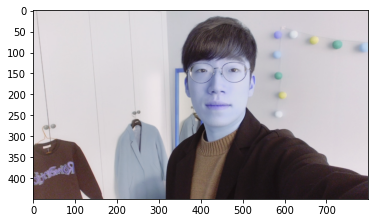

In [5]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'      #파일 찾아오고
img_bgr = cv2.imread(my_image_path)                                             # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()                                                       # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)                                                             # 사진 노트북에 출력하기
plt.show()                                                                      

OpenCV는 RGB가 아니고 BGR값을 써서 색이 바뀐거라고 함.

어째서 그런짓을...

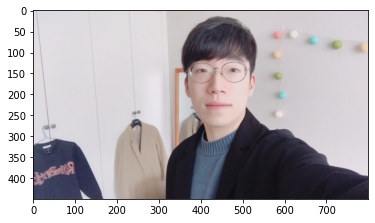

In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)              #cvtColor 컨버트칼라 메소드의 BGR2RGB를 써준거 같다
plt.imshow(img_rgb)
plt.show()

OpenCV(cv2) 이미지 읽기
.imread('이미지 파일', 0)   : 0의 경우 흑백, 1의 경우 칼라, -1의 경우 알파채널까지 읽는다고함. 

알파채널 : 각 화소에 대해 색상 표현의 데이터로부터 분리한 보조 데이터를 일컫는다. ; 키잉(크로마 키)등에 사용한다고 함

dlib의 face detector = 
HOG(histogram of Oriented Gradients) : 색상의 변화량을 계산함 (벡터로 나타날듯)
SVM(Support Vector Machine) : 선을 따라 이동하면서 특정 키(여기서는 얼굴)가 있는지 확인
을 한 이후
upsampling(이미지를 크게 키움) 과정을 통해 image pyramids(이미지 피라미드)로 얼굴을 더 크게 확인가능

In [10]:
detector_hog = dlib.get_frontal_face_detector()            #위 방식으로 알아서 얼굴을 찾는 메소드인가봄

In [11]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(345, 98) (531, 284)]]


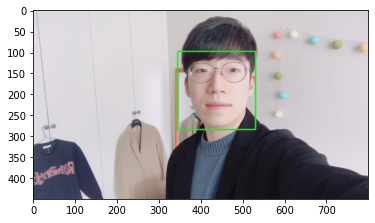

In [12]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)          #초록색으로 찾은 얼굴에 네모를 씌운다, 좌표도 찍어줌

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

얼굴을 찾았으면 정확하게 이목구비 위치를 찾아야한다.
Face landmark를 통해 대충 추론을 하고, 객체 내부의 점을 찾는 과정을 object keypoint estimation이라고 한다.

사용하는 AFLW dataset은 regression tree를 통해 학습된 예측 모델이다.

In [13]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)                 #dlib 모델을 가져옴(다운받음)

In [14]:
list_landmarks = []                                                  # 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)                  # landmark_predictor 가 좌표를 반환하는가봄
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


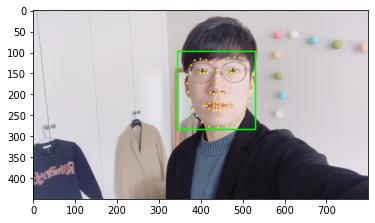

In [15]:
for landmark in list_landmarks:
    for point in landmark:                                            
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)               # .circle는 점을찍는 명령어인가봄

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [16]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])                                     # 분류상 점들 중 코의 위치가 인덱스 30인가봄
    x = landmark[30][0]                                      # 코의 x축 위치가 사각형 중앙인가봄
    y = landmark[30][1] - dlib_rect.height()//2              # 코의 y축 위치도 사각형 중앙이라,높이의 반만큼 빼줌; 픽셀 위가 0이니까 
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(437, 182)
(x,y) : (437,89)
(w,h) : (187,187)


In [17]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'      #스티커 위치 확인
img_sticker = cv2.imread(sticker_path)                                         # 스티커 이미지를 불러오기
img_sticker = cv2.resize(img_sticker, (w,h))                                   # 스티커 크기는 사각형에 너비에 맞게 리사이징함
print (img_sticker.shape)

(187, 187, 3)


In [18]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))                              #스티커 좌표를 일단 확인

(x,y) : (344,-98)


y축 값이 음수값이라 문제 발생 이미지 밖에 위치해서 잘린다.

In [19]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]                              
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]                                #이미지를 자른다.. 어째서?
    refined_y = 0                                                            #크기 조절하는게 나을꺼같은데

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (344,0)


In [20]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)              #스티커의 위치지정.. 복잡하군

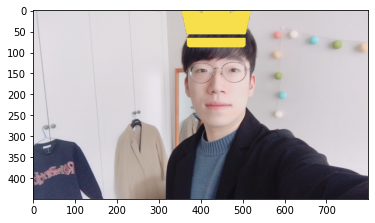

In [21]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()                                                          #sticker_area만 지정해주면 알아서 가는 함수 완성

## 여기서 부터 실습. 고양이 수염 붙이기

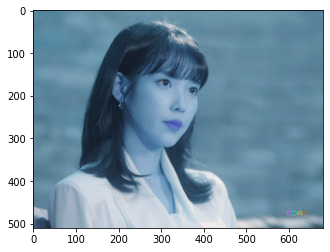

In [22]:
#원본 이미지부터 가져오자

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/IU.png'        #파일 찾아오고
img_bgr = cv2.imread(my_image_path)                                             
img_show = img_bgr.copy()                                                       #원본사진에 사각형 나옴 안되니 복사해줌
plt.imshow(img_bgr)                                                             #일단 출력
plt.show()       

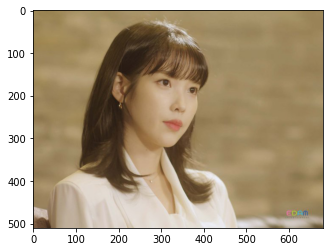

In [23]:
#역시 RGB값을 돌려야할꺼 같다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)              #cvtColor 컨버트칼라 메소드의 BGR2RGB를 써준거 같다
plt.imshow(img_rgb)
plt.show()

In [24]:
#얼굴 검출 / 랜드마크 검출
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(242, 118) (428, 304)]]


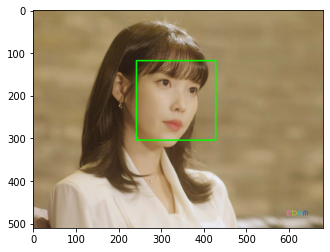

In [25]:
# 사각형을 만들자.
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)          
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)         
plt.imshow(img_show_rgb)
plt.show()

In [27]:
#점들 뽑아서 리스트로
list_landmarks = []                                                  
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)                  
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


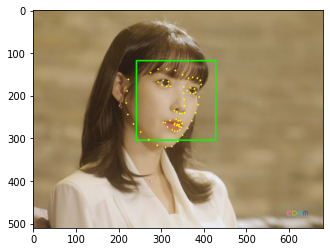

In [29]:
#점들 좌표를 찍어주자
for landmark in list_landmarks:
    for point in landmark:                                            
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)               

plt.imshow(img_show_rgb)
plt.show()

In [30]:
#이제 어디에 달지 고민해보면 되는데... 일단 코 조금 아래쪽 33번 위치에 찍어보자
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33])
    x = landmark[33][0] 
    y = landmark[33][1] 
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(344, 242)
(x,y) : (344,242)
(w,h) : (187,187)


In [31]:
# 스티커를 불러오자
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'  
img_sticker = cv2.imread(sticker_path)                                         
img_sticker = cv2.resize(img_sticker, (w,h))                                  
print (img_sticker.shape)

(187, 187, 3)


In [32]:
#혹시 이상할수도 있으니 사본하나를 더 따둬야겠음
img_test=img_rgb.copy()              #deepcopy 안써도 괜찮은가봄

x,y좌표는 변경 필요없으니, 일단 리파인안해도 될꺼같다
이제 변수 Sticker_Area만 지정해주면 될꺼같다.

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

이거였는데 보자

일반형으로 고치면

sticker_area= img_test[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_test[y:y+img_sticker.shape[0], x:x+img_sticker.shape[0]] = np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
이거겠지

In [41]:
sticker_area= img_test[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_test[y:y+img_sticker.shape[0], x:x+img_sticker.shape[0]] = np.where(img_sticker==255,sticker_area,img_sticker==0).astype(np.uint8)

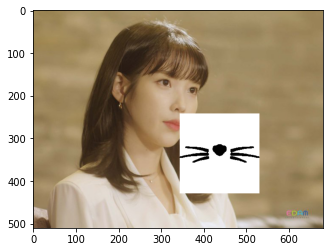

In [42]:
plt.imshow(img_test)                                                             
plt.show() 

???

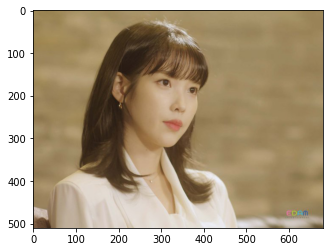

In [38]:
plt.imshow(img_rgb)                                                             
plt.show() 

알았다... 코 위치 왼쪽위부터 스티커가 들어간거구나   -> 위치 이동해야함

re_x= x - w // 2

re_y= y - h // 2

근데 어째서 색반전이지, 흰색이 없어지고, 검정색이 들가야 하는디

np.where 함수를 보면 where(조건문, 참일때 값, 거짓일때 값) 이다. 그러니까

검정색일때, 참이면 스티커를 그대로 내고, 거짓일때 투명=0을 내면 되겠군. -> np.where(img_sticker==255,sticker_area,img_sticker=0).astype(np.uint8)

In [56]:
re_x= x - w // 2
re_y= y - h // 2 -5 #쪼끔만 올리자 

In [57]:
img_test=img_rgb.copy()   #테스트 리셋

In [58]:
sticker_area= img_test[re_y:re_y+img_sticker.shape[0], re_x:re_x+img_sticker.shape[1]]
img_test[re_y:re_y+img_sticker.shape[0], re_x:re_x+img_sticker.shape[0]] = np.where(img_sticker==255,sticker_area,img_sticker=0).astype(np.uint8)

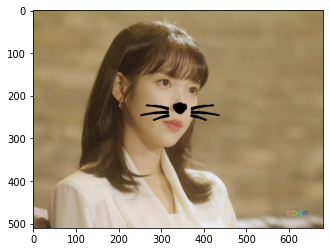

In [59]:
plt.imshow(img_test)                                                             
plt.show() 

일단 시키는 곳까진 완료. 다만 사진이 정면이 아니라서 만족스럽지는 않다.


이걸 피사체에 따라 회전시키기 위해서는..
점들의 위치에 따라서 정면에서 얼마나 회전되있는가를 판단하면 된다.
임의로 지금 사진에 찍는건 의미가 없고
사진보고 고개가 돌아간 정도를 파악하도록 데이터를 학습시키는 거.. 
그다지 어렵지 않을꺼 같긴하지만 일단 pass

해볼만한 방법은 눈하고 눈사이의 점의 기울기를 그대로 회전시키는 정도?
이건 단순히 2차원회전만 따라갈 수 있겠지만 없는거보단 나을듯

이론상, 사람 머리를 타원형 구 형태로 근사한다고 하면
해부학적으로 눈썹의 위치, 코의 위치, 턱의 위치 등으로
근사한 타원의 모양을 그릴 수 있고, 보는 위치를 파악할 수 있을것이다
https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=NPAP07906065&dbt=NPAP
헉 진짜 있다.


이것도 있다
http://koreascience.kr/article/CFKO200714835306237.pdf


역시 모델을 아예 만들어 두면 편하겠지만
지금 얻을 수 있는 데이터는 얼굴을 파악하는 점 68개
이 점들을 통해 사람의 구형 머리를 3차원에서 그려서
접선위치에서 '무게중심 -> 코의 점 좌표 벡터'에 평행하도록 수염을 회전시키면 가능


크기는 디폴트값이랑 비교해보고 늘리거나 줄여야할수도 있음

내 머리 데이터로 근사해보자

머리길이 : 25cm 눈썹위치 8cm, 코 위치 13cm, 턱 위치는 맨 아래로 근사

머리너비 : 14cm, 코 위치 7cm, 눈썹 위치 5, 10cm

머리두깨 : 15cm, 눈썹, 코는 표면에 붙어있다고 근사


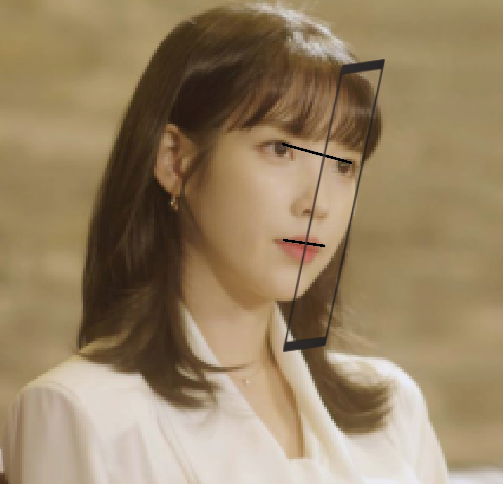

눈과 입술은 인간 머리에서 대칭이라고 가정하면,
이제 눈 두점(x,y), 입술 두점 (x,y)좌표로부터 이 점에 수직이고
머리 모양이 근사된 구의 xz 평면을 구할 수 있다.
마찬가지로 코 두점(x,y) 평균점을 통해서 xy평면을,
턱과 코 사이의 거리를 통해 5/3r(근사) 를 구할 수 있으므로.
코 지점의 법선벡터를 구할 수 있을 것이다.
이 벡터를 구면좌표계로 변환 -> (r,Θ, Φ)를 통해
비틀림 효과를 구현할 수 있을것이라고 생각한다.

이리저리 찾아봤지만
opencv 패키지의 rotate로 평면에서 Θ값만큼 회전은 가능하지만
z축까지 부여해서 r만큼 이동한 후에(Θ, Φ)에 맞춰 회전시킬 수 있는 방법은 모르겠다.

스티커의 중앙점을 축으로 해서 픽셀의 z값만 부여할 수 있다면
구좌표 변환 벡터를 곱하면 될꺼같은데...

파이썬에 대한 지식이 부족한게 많이 아쉽지만
아무튼 이론상, 구해진 점들을 통해 수염모양을 회전시키는 것은 가능할 것으로 보인다.

물론... 이렇게 역산하기보다는
코위치를 통해 스티커가 변환되는 적절한 벡터를 알 수 있도록 학습시키는것이 빠를것이다.